# Assinatura ciclostacionária de um sinal modulado

## Geração de uma sequência de pulsos PAM
Selecionando a quantidade de pulsos $l_{frame}$, de níveis $Q$ e densidade espectral de potência $Sm$, a função *pam(l_frame,Q,Sm)* gera uma sequência aleatória de pulsos.

<StemContainer object of 3 artists>

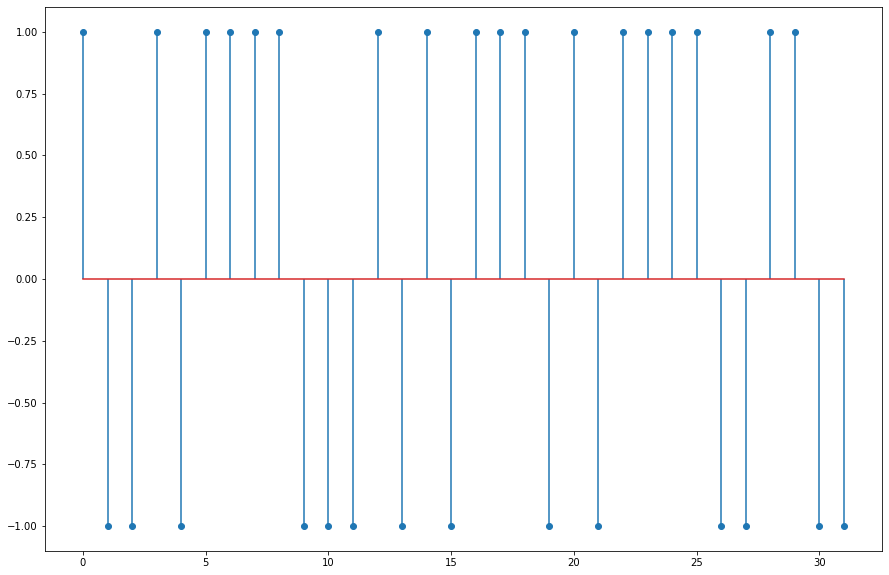

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10
%run pam.py
l_frame=32
Q=2 #Q=4
Sm=1 #Sm=5
ms = pam(l_frame,Q,Sm)
plt.stem(ms)

Energia média do sinal

In [2]:
print(np.sum(ms**2)/l_frame)

1.0


## Formatação dos pulsos
Para representar melhor um sinal transmitido, cada pulso é formatado utilizando um pulso raiz quadrada de cosseno levantado. Selecionando valores de comprimento do pulso em simbolos $symb$, fator de rolloff $\beta$ e sobreamostragem $oversampling$, a função *srrc($symb$ , $\beta$ , $oversampling$)* gera o pulso correspondente. Como a energia de cada símbolo já é definida na geração, o pulso precisa ter energia unitária, para isso, normaliza-se sua amplitude. 

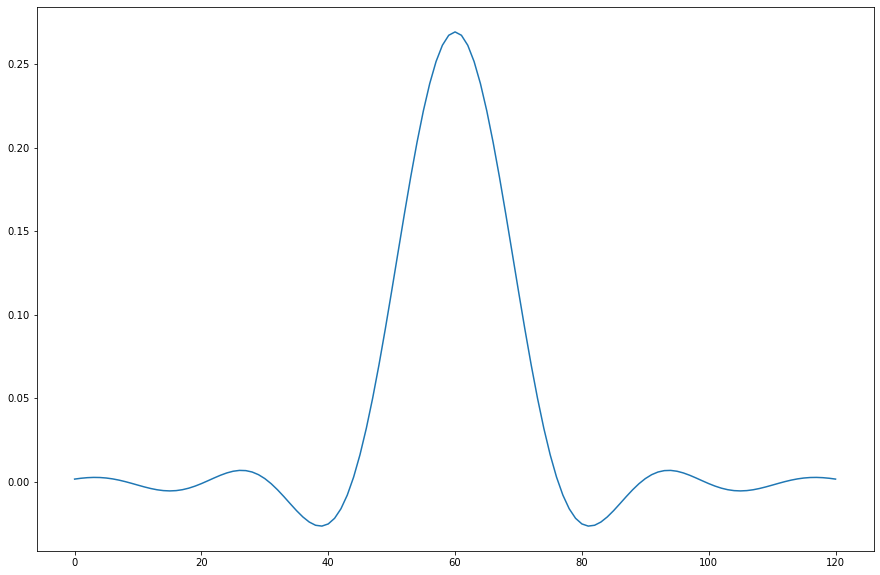

In [3]:
import numpy as np
%run srrc.py
symb = 3
beta = 0.75
oversampling = 20
ps = srrc(symb, beta, oversampling)
ps = ps/np.sqrt(np.sum(ps**2))
plt.plot(ps)

Energia do pulso após a normalização

In [4]:
print(np.sum(ps**2))

1.0


Definido o formato do pulso, cada valor original precisa ser representado por ele. Finalmente, cria-se uma versão sobreamostrada da mensagem original para convoluíla com o formato de pulso desejado.

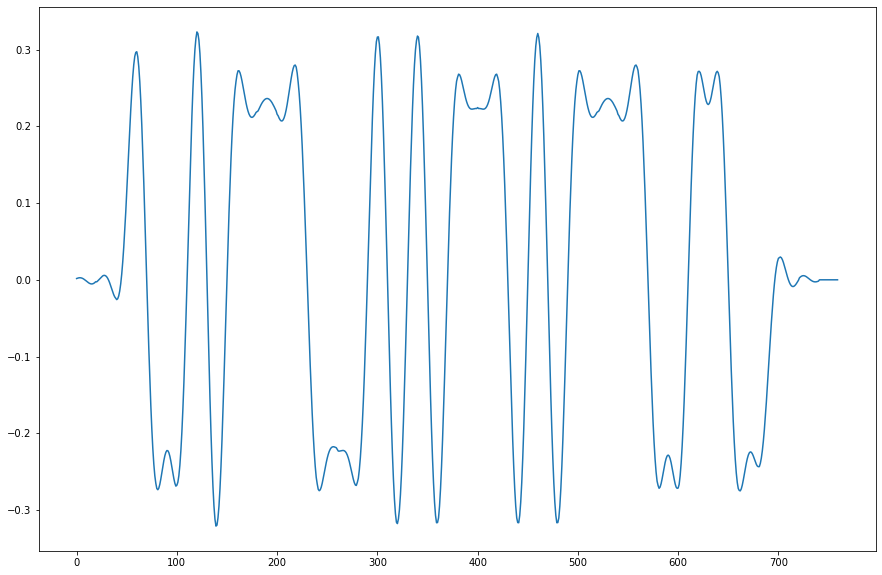

In [5]:
mups = np.zeros(ms.size*oversampling)
mups[range(0,mups.size,oversampling)]=ms
s = np.convolve(mups,ps)
plt.plot(s)

Energia média da mensagem após formatação de pulsos

In [6]:
print(np.sum(s**2)/l_frame)

0.9980315015673895
